In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
df=pd.read_csv("telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.TotalCharges.values   #its in string

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

ValueError: Unable to parse string " " at position 488

In [17]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]  #removing the string value of charges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [18]:
df.iloc[488]  #we can see in the dataframe the TotalCharges is blank

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [22]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [23]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [24]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
df1.TotalCharges.dtypes   #now the datatype of charges is changed to float

dtype('float64')

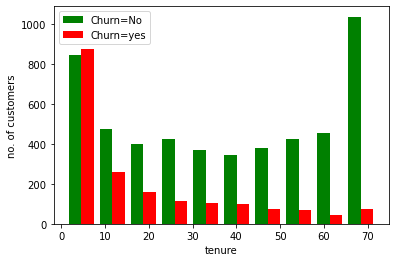

In [30]:
churn_no=df1[df1.Churn=='No'].tenure   #customer who are not leaving
churn_yes=df1[df1.Churn=='Yes'].tenure  #wo are leaving
plt.xlabel('tenure')
plt.ylabel('no. of customers')
plt.hist([churn_no,churn_yes],color=['green','red'],label=['Churn=No','Churn=yes'])
plt.legend()

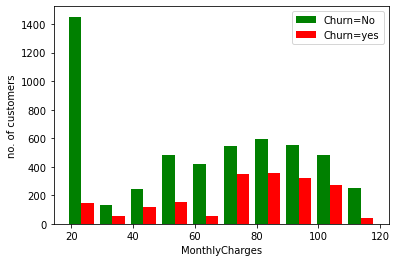

In [32]:
churn_no=df1[df1.Churn=='No'].MonthlyCharges   #customer who are not leaving due to mothly charges
churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges  #who are leaving
plt.xlabel('MonthlyCharges')
plt.ylabel('no. of customers')
plt.hist([churn_no,churn_yes],color=['green','red'],label=['Churn=No','Churn=yes'])
plt.legend()

In [55]:
def unique_value_column(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [56]:
unique_value_column(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [70]:
#replace no internet service as NO
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [71]:
unique_value_column(df1)

gender : ['Female' 'Male']
MultipleLines : ['No' 0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1 'No']
OnlineBackup : [1 0 'No']
DeviceProtection : [0 1 'No']
TechSupport : [0 1 'No']
StreamingTV : [0 1 'No']
StreamingMovies : [0 1 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


# 

In [72]:
yes_no=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for column in yes_no:
    df1.replace({'Yes':1,"No":0},inplace=True)

In [73]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [76]:
df1.replace({'Female':1,'Male':0},inplace=True)

In [78]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [77]:
df1.iloc[0]

gender                             1
SeniorCitizen                      0
Partner                            1
Dependents                         0
tenure                             1
PhoneService                       0
MultipleLines                      0
InternetService                  DSL
OnlineSecurity                     0
OnlineBackup                       1
DeviceProtection                   0
TechSupport                        0
StreamingTV                        0
StreamingMovies                    0
Contract              Month-to-month
PaperlessBilling                   1
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                              0
Name: 0, dtype: object

In [79]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns   #oneHotEncoding for some columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [80]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2490,0,0,0,1,39,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5299,1,1,1,0,28,1,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3254,0,1,0,0,17,1,0,0,1,1,...,0,0,1,1,0,0,0,0,1,0
235,0,0,0,0,2,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1


In [81]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [82]:
scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()   #scaling the values from 0 to 1

df2[scale]=scaler.fit_transform(df2[scale])

In [83]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3123,0,0,0,0,0.211268,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
6704,1,0,1,1,0.816901,1,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
3413,1,0,1,1,0.394366,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [84]:
x=df2.drop('Churn',axis="columns")
y=df2['Churn']

In [85]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [86]:
xtrain

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,1,0,1,1,0.985915,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
1730,0,0,0,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4086,1,0,1,0,1.000000,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
2259,1,0,0,0,0.098592,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [87]:
xtest   #20% testing

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2660,0,0,0,1,0.169014,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
744,1,0,0,0,0.056338,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5579,1,0,1,1,0.971831,1,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0
64,1,0,0,0,0.112676,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3287,0,0,1,1,0.253521,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,0,0,0,0,0.154930,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4396,0,1,0,0,0.000000,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4081,1,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1297,1,0,0,0,0.056338,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [88]:
len(xtrain.columns)

26

In [94]:
import tensorflow as tf
from tensorflow import keras
#input layer input shape for 1st,2nd layer
model=keras.Sequential([keras.layers.Dense(20, input_shape=(26,),activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')
])   #sigmoid is the o/p layer and relu is the hidden layer
model.compile(optimizer='adam',loss='binary_crossentropy'
             ,metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=100)                                          

Epoch 1/100
176/176 [==============================] - 14s 3ms/step - loss: 0.5242 - accuracy: 0.7564
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4342 - accuracy: 0.7918
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.7998
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8011
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4147 - accuracy: 0.8046
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8069
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8039
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4094 - accuracy: 0.8080
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4093 - accur

In [95]:
model.evaluate(xtest,ytest)

44/44 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.7832


[0.4585138261318207, 0.783226728439331]

In [96]:
y=model.predict(xtest)
y[:5]

array([[0.22108796],
       [0.38837606],
       [0.00428513],
       [0.7089547 ],
       [0.5071084 ]], dtype=float32)

In [97]:
ytest[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [98]:
y_predict=[]
for element in y:
    if element>0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [100]:
y_predict[:5]   #82% accuracy

[0, 0, 0, 1, 1]

Text(69.0, 0.5, 'Truth')

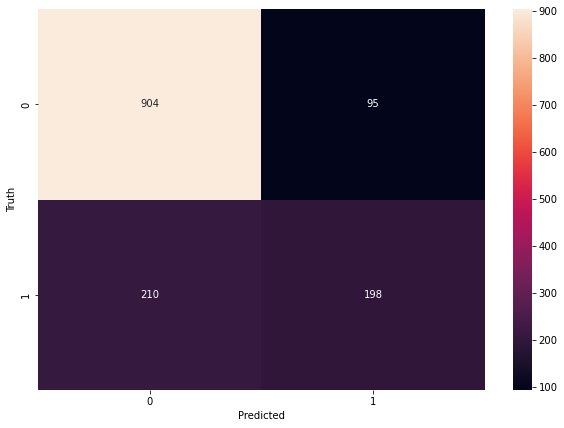

In [102]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_predict)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')    #diagonal is a correct prediction-904 and 198

In [103]:
round((904+198)/(904+198+210+95),2)

0.78

In [106]:
#how many samples predicted to be zero
round((904/(904+210)),2)

0.81

In [108]:
round((198/(92+198)),2)   #predicted to be 1

0.68

In [110]:
#recall for zero class
round(904/(904+95),2)

0.9

In [111]:
round(198/(198+210),2)

0.49

In [ ]:
#precision refers to the %ge of the results which are relevent
#recall refers to the %ge of total relevant results correctly classified by our algorithm
#f score is the harmonic mean of precision nd recall